# DATA VISUALIZATION LAB-7 Web Scraping

Name: Gurvinder Kaur Matharu<br>
PRN: 20190802077<br>

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re

In [2]:
link = 'https://www.coursera.org/collections/popular-free-courses'

In [3]:
get_website = requests.get(link, timeout=1000)
content = BeautifulSoup(get_website.content)
#print(content.prettify())

In [4]:
print(content.title)

<title data-react-helmet="true">Popular Free Courses | Coursera</title>


In [5]:
content.title.name

'title'

In [6]:
course_names = []
course_rating = []
course_provider = []
num_reviews = []

In [7]:
for i in content.find_all('div', class_='horizontal-box'):
    course = i.find_all('h4', class_='cds-119 css-j28nqf cds-121')
    rating = i.find_all('span', class_='cds-119 css-1of8lj1 cds-121')
    provider = i.find_all('span')
    reviews = i.find_all('span', class_='cds-119 css-pa6u6k cds-121')
    if course != []:
        course_names.append(course[0].text.split('\n')[0])
        course_rating.append(rating[0].text.split('\n')[0])
        course_provider.append(provider[0].text.split('\n')[0])
        num_reviews.append(reviews[0].text.split('\n')[0])

In [8]:
course_df = pd.DataFrame()
course_df['Name'] = course_names
course_df['Rating'] = course_rating
course_df['Reviews'] = num_reviews
course_df['Course Provider'] = course_provider
course_df

,Name,Rating,Reviews,Course Provider
0,The Science of Well-Being,4.9,Yale University,Yale University
1,Learning How to Learn: Powerful mental tools t...,4.8,Deep Teaching Solutions,Deep Teaching Solutions
2,Financial Markets,4.8,Yale University,Yale University
3,COVID-19 Contact Tracing,4.9,Johns Hopkins University,Johns Hopkins University
4,Successful Negotiation: Essential Strategies a...,4.8,University of Michigan,University of Michigan
5,English for Career Development,4.8,University of Pennsylvania,University of Pennsylvania
6,"Algorithms, Part I",4.9,Princeton University,Princeton University
7,Seeing Through Photographs,4.8,The Museum of Modern Art,The Museum of Modern Art
8,Management of Fashion and Luxury Companies,4.7,Università Bocconi,Università Bocconi
9,Private Equity and Venture Capital,4.8,Università Bocconi,Università Bocconi


In [9]:
course_df.shape

(21, 4)

Which University provided most number of popular free courses?

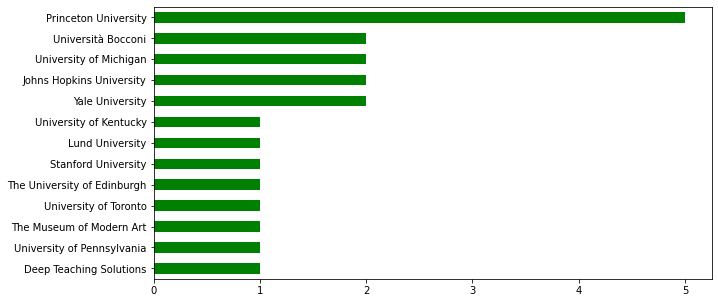

In [10]:
fig= plt.figure(figsize=(10,5))
course_df['Course Provider'].value_counts().sort_values(ascending=True).plot(kind='barh', color='green')
plt.show()

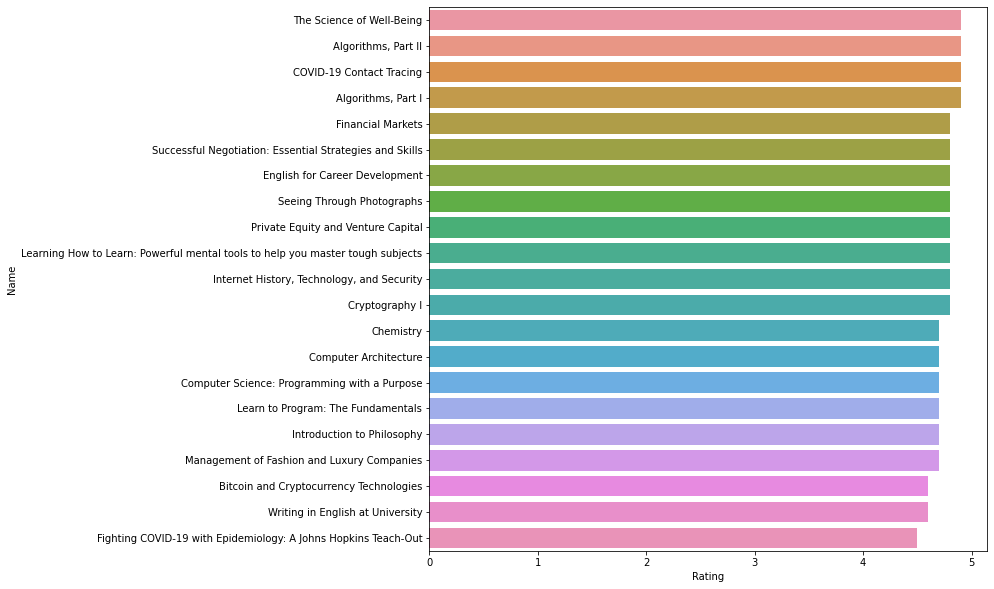

In [11]:
#Rank the courses by their rating
import seaborn as sns
fig= plt.figure(figsize=(10,10))
course_df['Rating'] = course_df['Rating'].astype(float)
course_df.sort_values(by=['Rating'], inplace=True, ascending = False)
sns.barplot(x='Rating' , y='Name', data=course_df)
plt.show()